**Import the relevant libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')

**Load the data**

In [5]:
customer_features1 = pd.read_csv('customer_features1.csv')

In [6]:
customer_features1

,CustomerID,CustGender,CustLocation,Age,Recency,Frequency,AvgMonetary,TotalMonetary
0,C1010011,F,NEW DELHI,24,74,2,7.171923,14.343846
1,C1010012,M,MUMBAI,22,117,1,7.313220,7.313220
2,C1010014,F,MUMBAI,32,154,2,6.310259,12.620517
3,C1010018,F,CHAMPARAN,26,85,1,3.433987,3.433987
4,C1010024,M,KOLKATA,28,113,1,8.517393,8.517393
...,...,...,...,...,...,...,...,...
814186,C9099836,M,BHIWANDI,26,154,1,6.539586,6.539586
814187,C9099877,M,BANGALORE,20,85,1,5.407172,5.407172
814188,C9099919,M,GUNTUR,23,113,1,4.844187,4.844187
814189,C9099941,M,CHENNAI,21,103,1,3.931826,3.931826


**Select the features**

In [8]:
x = customer_features1.iloc[:, 3:8]

In [9]:
x

,Age,Recency,Frequency,AvgMonetary,TotalMonetary
0,24,74,2,7.171923,14.343846
1,22,117,1,7.313220,7.313220
2,32,154,2,6.310259,12.620517
3,26,85,1,3.433987,3.433987
4,28,113,1,8.517393,8.517393
...,...,...,...,...,...
814186,26,154,1,6.539586,6.539586
814187,20,85,1,5.407172,5.407172
814188,23,113,1,4.844187,4.844187
814189,21,103,1,3.931826,3.931826


**Standardize the features before clustering**

In [18]:
columns_to_scale = ['Age', 'Recency', 'Frequency', 'AvgMonetary', 'TotalMonetary']

In [20]:
#declare a scaler object
scaler = StandardScaler()

In [22]:
scaler.fit(x)

StandardScaler()

In [24]:
x_scaled = scaler.fit_transform(x[columns_to_scale])

In [26]:
x_scaled

array([[-0.94284168, -0.69043833,  1.92403464,  0.82806146,  2.41461942],
       [-1.35228425, -0.15527677, -0.39694904,  0.92430932,  0.11098863],
       [ 0.69492856,  0.30521108,  1.92403464,  0.24111923,  1.84995938],
       ...,
       [-1.14756296, -0.20505924, -0.39694904, -0.75752861, -0.69800638],
       [-1.55700553, -0.32951542, -0.39694904, -1.37900426, -0.99694761],
       [ 1.10437112, -0.67799271, -0.39694904,  0.54220552, -0.07281033]])

**New dataframe for the scaled features**

In [31]:
# Convert the scaled array back into a DataFrame
scaled_df = pd.DataFrame(x_scaled, columns=columns_to_scale, index=x.index)

In [33]:
scaled_df

,Age,Recency,Frequency,AvgMonetary,TotalMonetary
0,-0.942842,-0.690438,1.924035,0.828061,2.414619
1,-1.352284,-0.155277,-0.396949,0.924309,0.110989
2,0.694929,0.305211,1.924035,0.241119,1.849959
3,-0.533399,-0.553537,-0.396949,-1.718118,-1.160068
4,-0.123957,-0.205059,-0.396949,1.744559,0.505544
...,...,...,...,...,...
814186,-0.533399,0.305211,-0.396949,0.397331,-0.142498
814187,-1.761727,-0.553537,-0.396949,-0.374039,-0.513541
814188,-1.147563,-0.205059,-0.396949,-0.757529,-0.698006
814189,-1.557006,-0.329515,-0.396949,-1.379004,-0.996948


**Make a copy of the scaled features**

In [43]:
scaled_num_features = scaled_df.copy()

In [45]:
scaled_num_features

,Age,Recency,Frequency,AvgMonetary,TotalMonetary
0,-0.942842,-0.690438,1.924035,0.828061,2.414619
1,-1.352284,-0.155277,-0.396949,0.924309,0.110989
2,0.694929,0.305211,1.924035,0.241119,1.849959
3,-0.533399,-0.553537,-0.396949,-1.718118,-1.160068
4,-0.123957,-0.205059,-0.396949,1.744559,0.505544
...,...,...,...,...,...
814186,-0.533399,0.305211,-0.396949,0.397331,-0.142498
814187,-1.761727,-0.553537,-0.396949,-0.374039,-0.513541
814188,-1.147563,-0.205059,-0.396949,-0.757529,-0.698006
814189,-1.557006,-0.329515,-0.396949,-1.379004,-0.996948


**Clustering**

In [93]:
kmeans = KMeans(4)

In [95]:
kmeans.fit(x_scaled)

KMeans(n_clusters=4)

In [97]:
identified_clusters = kmeans.fit_predict(scaled_num_features)
identified_clusters

array([3, 2, 3, ..., 1, 1, 2])

In [99]:
#create a dataframe to see things more clearly
data_with_clusters = scaled_num_features
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Age,Recency,Frequency,AvgMonetary,TotalMonetary,Cluster
0,-0.942842,-0.690438,1.924035,0.828061,2.414619,3
1,-1.352284,-0.155277,-0.396949,0.924309,0.110989,2
2,0.694929,0.305211,1.924035,0.241119,1.849959,3
3,-0.533399,-0.553537,-0.396949,-1.718118,-1.160068,1
4,-0.123957,-0.205059,-0.396949,1.744559,0.505544,2
...,...,...,...,...,...,...
814186,-0.533399,0.305211,-0.396949,0.397331,-0.142498,2
814187,-1.761727,-0.553537,-0.396949,-0.374039,-0.513541,1
814188,-1.147563,-0.205059,-0.396949,-0.757529,-0.698006,1
814189,-1.557006,-0.329515,-0.396949,-1.379004,-0.996948,1


**Selecting the number of clusters using the elbow method**

In [77]:
kmeans.inertia_

2153998.3936751923

In [79]:
#to plot the elbow, we need to calculate the WCSS for each cluster
#we do this with a loop
wcss=[]
for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [81]:
wcss

[4070954.999999975,
 2806446.452309836,
 2153998.1912693367,
 1716576.5066290996,
 1464609.450834741,
 1321733.8268644244,
 1196821.6203200417,
 1094890.9214995694,
 1015771.2301635682,
 944096.153627748]

**The elbow method**

Text(0, 0.5, 'Within-Cluster Sum of Squares')

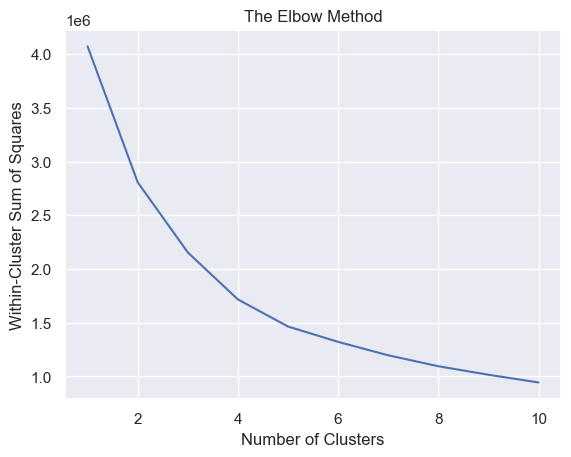

In [84]:
number_clusters = range(1,11)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')

**Create the plot**

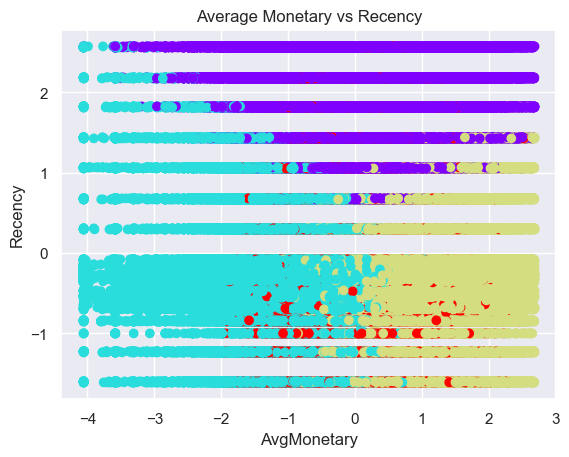

In [101]:
plt.scatter(data_with_clusters['AvgMonetary'], data_with_clusters['Recency'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlabel('AvgMonetary')
plt.ylabel('Recency')
plt.title('Average Monetary vs Recency')
plt.show()

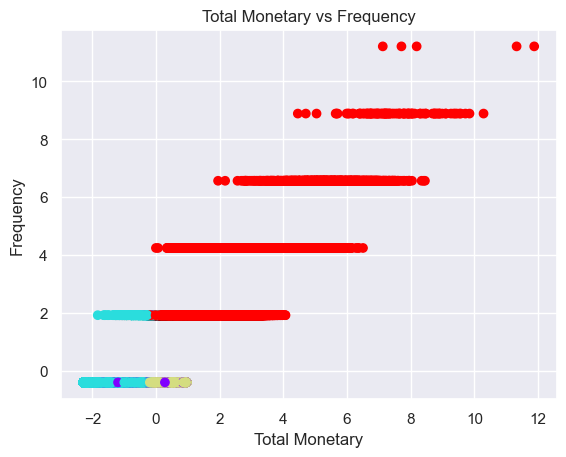

In [103]:
plt.scatter(data_with_clusters['TotalMonetary'], data_with_clusters['Frequency'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlabel('Total Monetary')
plt.ylabel('Frequency')
plt.title('Total Monetary vs Frequency')
plt.show()